# CDS Index Vs. Equity Options

### Rationale

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from xbbg import blp

In [15]:
# Get Data

Start = "20200101"
End = ""

TickerList = ["ITRXTX5I Index", "PUTWD=2 OC Equity"]

df = blp.bdh(TickerList, "PX_Last", start_date=Start)
df.columns = ["ITRAXX5Y", "S&PPuts"]

In [16]:
Ret = (np.log(df) - np.log(df.shift(1))).dropna()
Strat = - Ret["S&PPuts"] - Ret["ITRAXX5Y"]
Strat[0] = 100
Strat = Strat + 1
Strat.index = pd.to_datetime(Strat.index)

(array([737425., 737432., 737439., 737446., 737456., 737463., 737470.,
        737477., 737485.]),
 <a list of 9 Text xticklabel objects>)

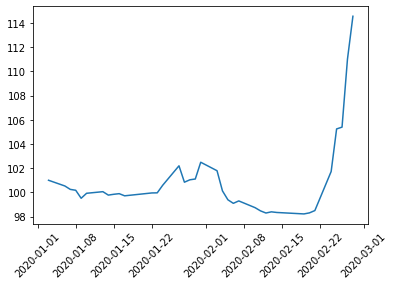

In [17]:
plt.plot(Strat.cumprod())
plt.xticks(rotation=45)